In [5]:
import numpy as np
import os
from glob import iglob
from collections import defaultdict
import collections
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
from data_extraction import *

OrderedDict([(1000, [3.7649720999999996, 3.7715277, 3.7301696, 3.8227686, 3.799101]), (5000, [3.7830824, 3.7436075, 3.7556238, 3.7920537000000003, 3.7809399]), (10000, [3.7470797, 3.7771995, 3.7613611, 3.7757234, 3.7204953000000005]), (15000, [3.8099966, 3.7329546000000002, 3.804344300000001, 3.7321125, 3.7145792999999996]), (20000, [3.8008982999999996, 3.7870440999999997, 3.7547282999999996, 3.8266015, 3.7943211999999997])])
OrderedDict([(1000, [4.5504989, 4.5621923, 4.5316033000000004, 4.539031399999999, 4.579017]), (5000, [4.5802461, 4.565379, 4.545961299999999, 4.5511074, 4.528548699999999]), (10000, [4.5365003, 4.574724500000001, 4.5201170999999984, 4.489903500000001, 4.5566789000000005]), (15000, [4.5658327000000005, 4.4994055, 4.551557799999999, 4.551198799999999, 4.5379534999999995]), (20000, [4.538840199999999, 4.5330253, 4.5626798, 4.5281476000000005, 4.523928399999999])])


/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure i

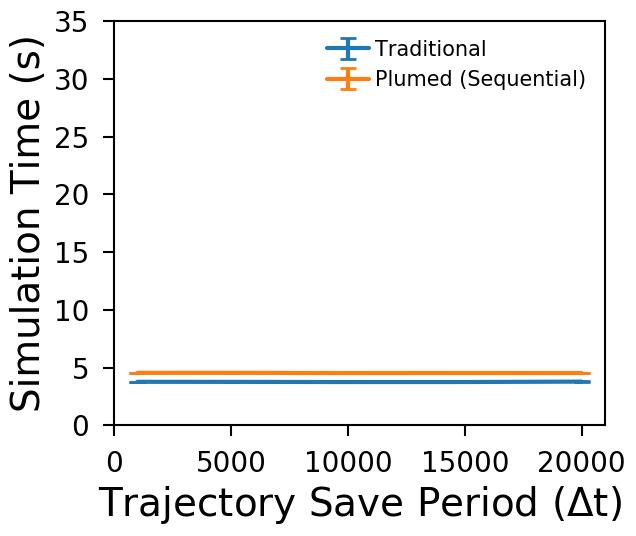

In [6]:

def timestamp_to_seconds(t):
    return sum(float(n) * m for n, m in zip(reversed(t), (1, 60, 3600)))


# This will return absolute paths
paths = {'sequential':'Traditional','sequential_in_transit':'Plumed (Sequential)'}

for path,legend in paths.items():
    total_times = defaultdict(list)
    sim_time_dict = defaultdict(list)
    log_files = [os.path.abspath(f) for f in iglob('{}/slurm*'.format(path), recursive=True)]
    for log_file in log_files:
        L=get_L(log_file)
        N=get_N(log_file)
        #print(L,N)
        dump_interval = get_dump_interval(log_file)
        
        analysis_time=get_analysis_time(log_file,legend)
        total_time=get_total_time(log_file)
        sim_time=get_sim_time(log_file,legend)
        
        sim_time_dict[dump_interval].append(sim_time)
   
    #print(sim_time_dict)
    od = collections.OrderedDict(sorted(sim_time_dict.items()))
    print(od)
    sim_time_dict=od
    mean_tts = [np.mean(sim_time_vals) for dump_interval, sim_time_vals in sim_time_dict.items()]
    std_tts = [stats.sem(sim_time_vals) for dump_interval, sim_time_vals in sim_time_dict.items()]
    dump_intervals = sim_time_dict.keys()
    plt.errorbar(dump_intervals,
                 mean_tts,
                 std_tts, 
                 #fmt='o', 
                 #ecolor='g',
                 capsize=6, 
                 #elinewidth=3,
                 capthick=2,
                label=legend)
plt.xlabel("Trajectory Save Period ($\Delta$t)")
plt.ylabel("Simulation Time (s)")
plt.legend(fontsize=15)
plt.ylim(0,35)
plt.xlim(0,21000)
plt.savefig('figure_sim_time.png', transparent=True)
plt.show()

OrderedDict([(15, [2.59589, 2.59601, 2.5765499999999997, 2.5763499999999997, 2.61371]), (30, [17.376749999999998, 17.28433, 17.2444, 17.276510000000002, 17.20298]), (60, [140.11100000000002, 139.32229999999998, 138.954, 138.83429999999998, 138.98950000000002])])
OrderedDict([(15, [3.55808, 3.50277, 3.5144599999999997, 3.5146100000000002, 3.54742]), (30, [23.212509999999998, 23.2091, 23.215210000000003, 23.401970000000002, 23.19633]), (60, [186.3205, 185.8974, 185.62539999999998, 186.5814, 185.57569999999998])])


/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


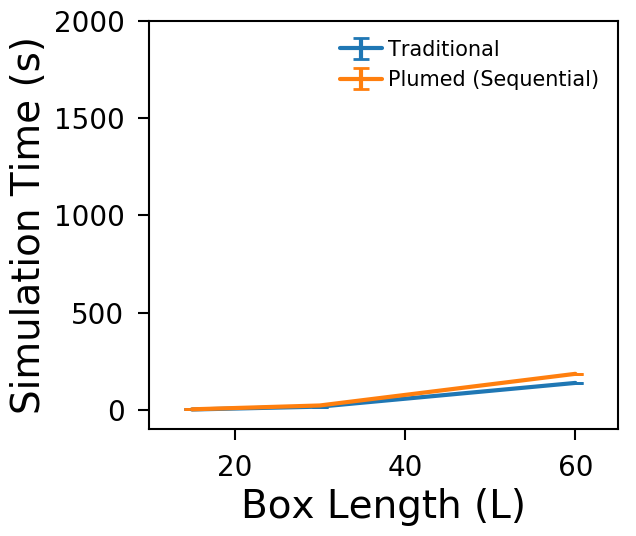

In [18]:
import numpy as np
import os
from glob import iglob
from collections import defaultdict
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import collections

def timestamp_to_seconds(t):
    return sum(float(n) * m for n, m in zip(reversed(t), (1, 60, 3600)))



# This will return absolute paths
paths = {'sequential_vary_N':'Traditional','sequential_in_transit_vary_N':'Plumed (Sequential)'}

for path,legend in paths.items():
    total_times = defaultdict(list)
    sim_time_dict = defaultdict(list)
    log_files = [os.path.abspath(f) for f in iglob('{}/T_*/log.prod'.format(path), recursive=True)]
    for log_file in log_files:
        total_time=None
        directory_name = log_file.split('/')[-2]
        dump_interval = float(directory_name.split('_')[5])
        L = int(directory_name.split('_')[3])
        sim_time = 0
        N=0
        #print(log_file)
        if dump_interval>500 and L<120:
            with open(log_file) as fp:
                line = fp.readline()
                #print(line)
                while line:
                    sim_time_labels = ['Pair','Neigh']#,'Comm','Other']#,'Modify','Ouput']
                    values = line.split('|')
                    if len(values)== 6 and any(label in values[0] for label in sim_time_labels):
                        values = line.split('|')
                        sim_time += float(values[2]) # Adding up times for all the sim_time_labels
                    if 'Created ' in line:
                        print(line)
                        values = line.split(' ')
                        print(values)
                        if values[2] == 'atoms\n':
                            N = float(values[1])
                            print('N',N)
                    line = fp.readline()
            if sim_time>0:
                #print(log_file)
                sim_time_dict[L].append(sim_time)
            else:
                #print('Could not find sim time in ',log_file)
                continue
    #print(sim_time_dict)
    od = collections.OrderedDict(sorted(sim_time_dict.items()))
    print(od)
    sim_time_dict=od
    mean_tts = [np.mean(sim_time_vals) for dump_interval, sim_time_vals in sim_time_dict.items()]
    std_tts = [stats.sem(sim_time_vals) for dump_interval, sim_time_vals in sim_time_dict.items()]
    dump_intervals = sim_time_dict.keys()
    plt.errorbar(dump_intervals,
                 mean_tts,
                 std_tts, 
                 #fmt='o', 
                 #linewidth=10,
                 #ecolor='g',
                 capsize=6, 
                 #elinewidth=3,
                 capthick=2,
                label=legend)
plt.xlabel("Box Length (L)")
plt.ylabel("Simulation Time (s)")
plt.legend(fontsize=15)
plt.ylim(-100,2000)
plt.xlim(10,65)
plt.savefig('figure_sim_time_vary_N.png', transparent=True)
plt.show()